In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

sns.set(font_scale = 4)
color_pal = sns.color_palette("colorblind", 6).as_hex()
colors = ','.join(color_pal)

def clear_all(): 
    plt.clf()
    plt.cla()
    plt.close()
    
def plot_and_save(df_orig, dataset_name, embedding_dim): 
    clear_all()
    dataset = df_orig[(df_orig.dataset == dataset_name) & (df_orig.dimensions == embedding_dim)]
    plt.figure(figsize=(30,20))

    ax = sns.barplot(x="algo", y="accuracy(%)", hue="poison", palette="colorblind", data=dataset, ci=None)
    ax.set(xlabel='Algorithm', ylabel='Accuracy (%)')
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_title(dataset_name.capitalize() + " $\mathbb{R}^" + str(embedding_dim) + "$")
    plt.savefig(f"figs/OE/{dataset_name}_{embedding_dim}d.png")


def plot_and_save_ml(df_origin, name):
    clear_all()
    plt.figure(figsize=(30,20))
    dataset_accuracy = df_origin[df_origin.dataset==name]["accuracy(%)"]
    ax = sns.barplot(x="algorithm", y="accuracy(%)", data=df_origin[df_origin.dataset==name],palette="colorblind", ci=None)
    ax.set(xlabel='Algorithm', ylabel='Accuracy (%)')
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_ylim(dataset_accuracy.min() - 5, 100)
    ax.set_title(name)
    plt.savefig(f"figs/ML/{name}.png")

def rename_lloc(row): 
    if "lloc" in row["algorithm"]: 
        return f"lloc ({row.type})"
    else: 
        if "knn" in row["algorithm"]: 
            return f"knn (baseline)"
        else: 
            return row["algorithm"]

In [30]:
df = pd.read_csv("./results_other_oe.csv")
df_mine = pd.read_csv("./results.csv")

In [31]:
df.head()

df_mine["accuracy(%)"] = (1 - df_mine.error)*100
df_mine["buckets"] = pd.Series(1 / df_mine.eps, dtype=np.int16)
df_mine["d_algo"] = df_mine["dimensions"].map("lloc_{}d".format) 
df_mine["algo"] = pd.Series("LLOC", range(len(df_mine.buckets)))
df_mine = df_mine[df_mine.ttest_split == 0.3]
df_mine = df_mine[["algo","dataset", "dimensions", "poison", "accuracy(%)", "buckets", "d_algo"]]
df_mine.head()

,algo,dataset,dimensions,poison,accuracy(%),buckets,d_algo
0,LLOC,mnist,1,0.0,96.004440,8,lloc_1d
1,LLOC,mnist,2,0.0,96.115427,8,lloc_2d
2,LLOC,mnist,1,0.0,96.663079,8,lloc_1d
3,LLOC,mnist,2,0.0,96.663079,8,lloc_2d
4,LLOC,mnist,1,0.0,97.371303,8,lloc_1d


In [32]:
df = df[(df.dimensions == 2) | (df.dimensions==1)]
df["algo"] = df.algo.map(lambda x: x.lower())
df["d_algo"] = df[["dimensions", "algo"]].apply(lambda x: x["algo"] + "_" + str(x["dimensions"]) + "d", axis=1) 
df["buckets"] = pd.Series(0, range(len(df["algo"])))
df = df[["algo","dataset", "dimensions", "poison", "accuracy(%)", "buckets", "d_algo"]]
df["algo"] = df["algo"].map(lambda x: x.upper())
df.head()

,algo,dataset,dimensions,poison,accuracy(%),buckets,d_algo
0,LOE,random,2,0.00,67.228464,0.0,loe_2d
1,SOE,random,2,0.00,70.224719,0.0,soe_2d
6,LOE,random,2,0.10,59.074733,0.0,loe_2d
7,SOE,random,2,0.10,66.014235,0.0,soe_2d
12,LOE,random,2,0.15,50.867052,0.0,loe_2d


In [33]:
df_joined = pd.concat([df, df_mine])
#df_joined = df_joined.sort_values('algo', ascending = False).reset_index(drop=True)
df_joined["poison"] = df_joined["poison"].map(lambda x: str(int(x * 100)) + "%")
#df_joined = df_joined.sort_values('poison', ascending = True).reset_index(drop=True)


In [34]:
datasets = df_joined["dataset"].unique()
dimensions = df_joined["dimensions"].unique()

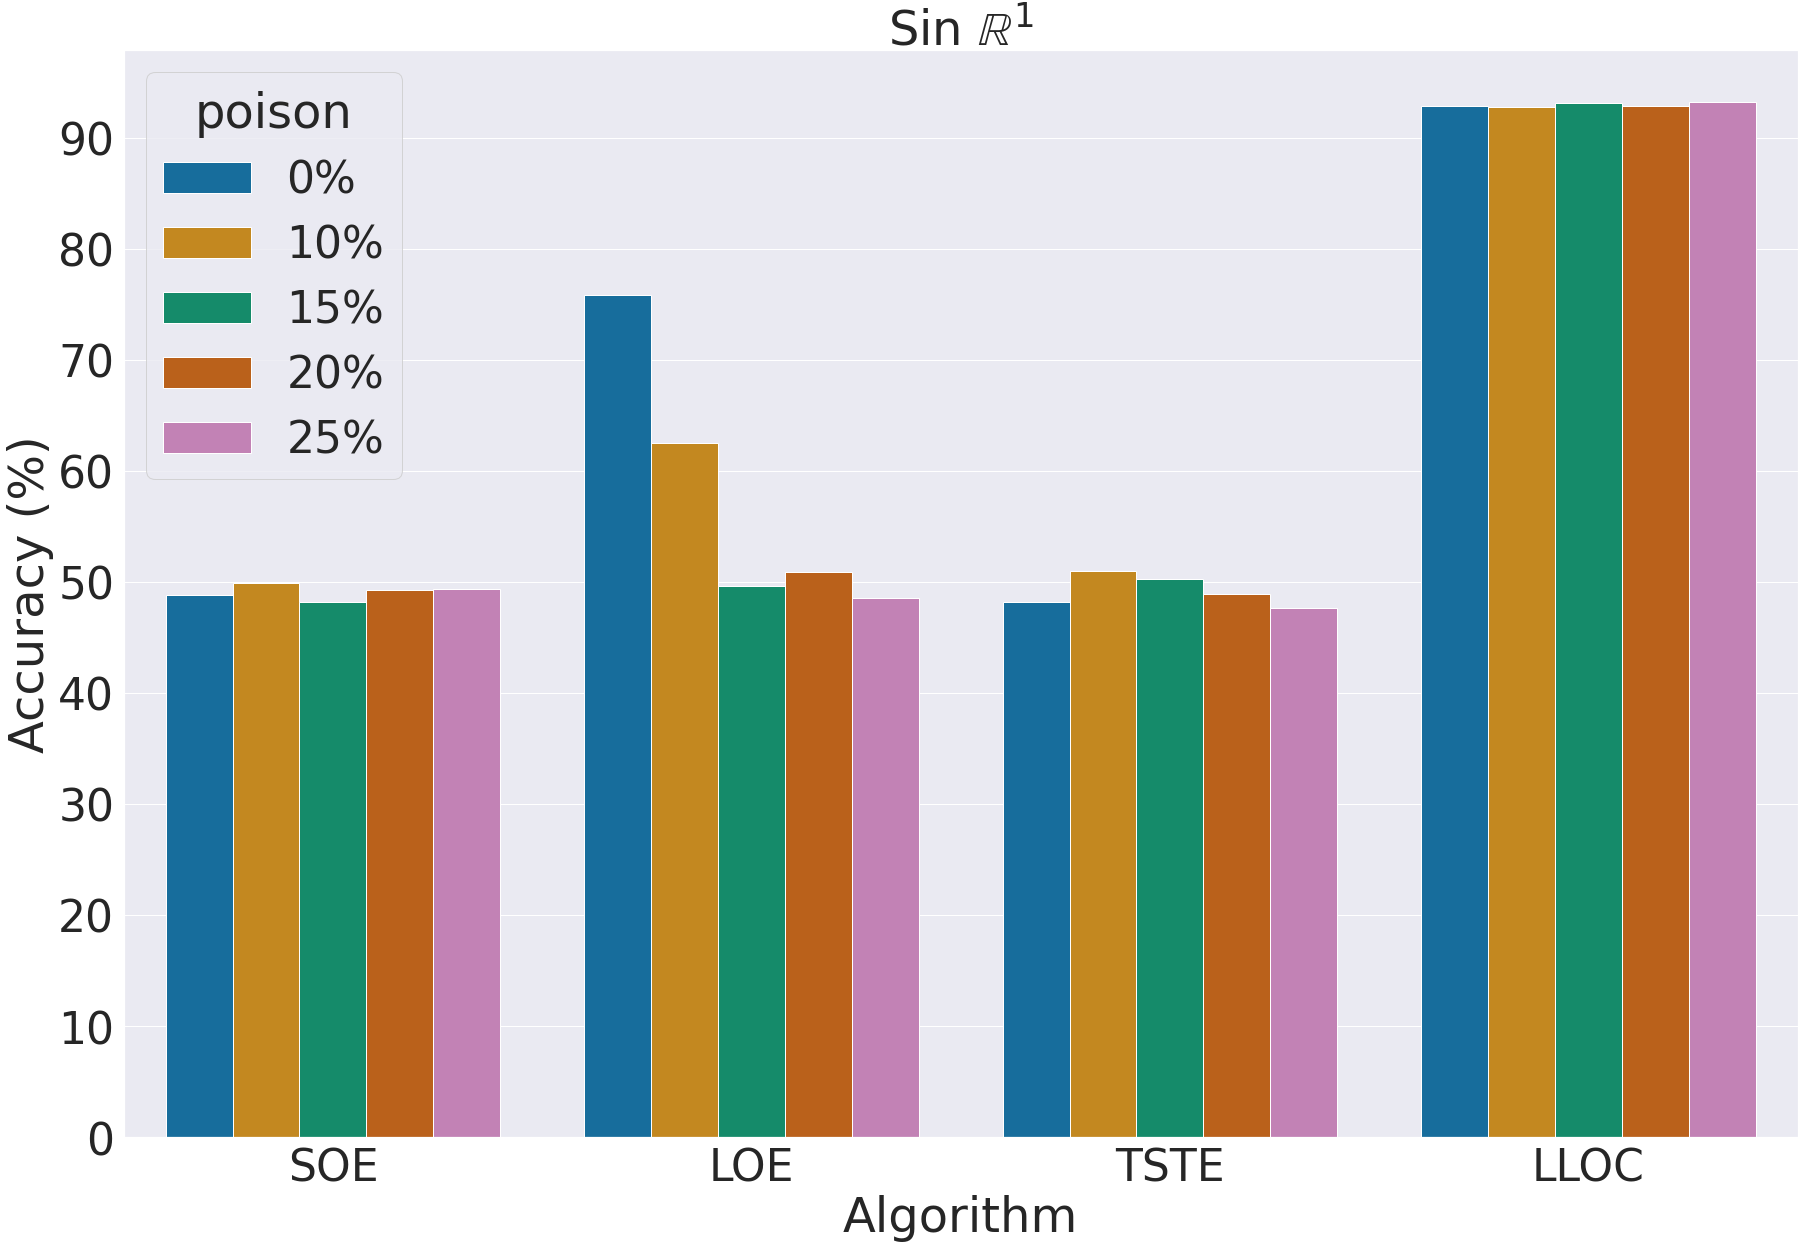

In [35]:
for ds in datasets: 
    for dim in dimensions: 
        plot_and_save(df_joined, ds, dim)

In [345]:
results_ml = pd.read_csv("results_metric_learning.csv")
results_metric_learning_lptml = pd.read_csv("results_metric_learning_lptml.csv")
results_metric_learning_lptml["accuracy(%)"] = (1 - results_metric_learning_lptml.error)*100
results_metric_learning_lptml = results_metric_learning_lptml[["dataset","algorithm","accuracy(%)", "type","dimensions"]]
results_metric_learning_lptml = results_metric_learning_lptml[["dataset","algorithm","accuracy(%)", "type","dimensions"]]
results_ml = results_ml[["dataset","algorithm","accuracy(%)", "type","dimensions"]]
results_metric_learning_lptml


,dataset,algorithm,accuracy(%),type,dimensions
0,iris,MMC,96.8,NaN,NaN
1,iris,LSML,96.0,NaN,NaN
2,iris,ITML,97.0,NaN,NaN
3,iris,NCA,94.9,NaN,NaN
4,iris,MLKR,95.0,NaN,NaN
...,...,...,...,...,...
67,breast_cancer_poisoned,MLKR,92.4,NaN,NaN
68,breast_cancer_poisoned,LFDA,91.9,NaN,NaN
69,breast_cancer_poisoned,LMNN,91.2,NaN,NaN
70,breast_cancer_poisoned,GMML,91.3,NaN,NaN


In [346]:
all_results_ml = pd.concat([results_ml,results_metric_learning_lptml])
all_results_ml["algorithm"] = all_results_ml[["algorithm","type"]].apply(lambda x: rename_lloc(x),axis=1) 


In [347]:
all_results_ml.head()


all_results_ml["dataset"] = all_results_ml["dataset"].map(lambda x: " ".join([a.capitalize() for a in x.split("_")]))


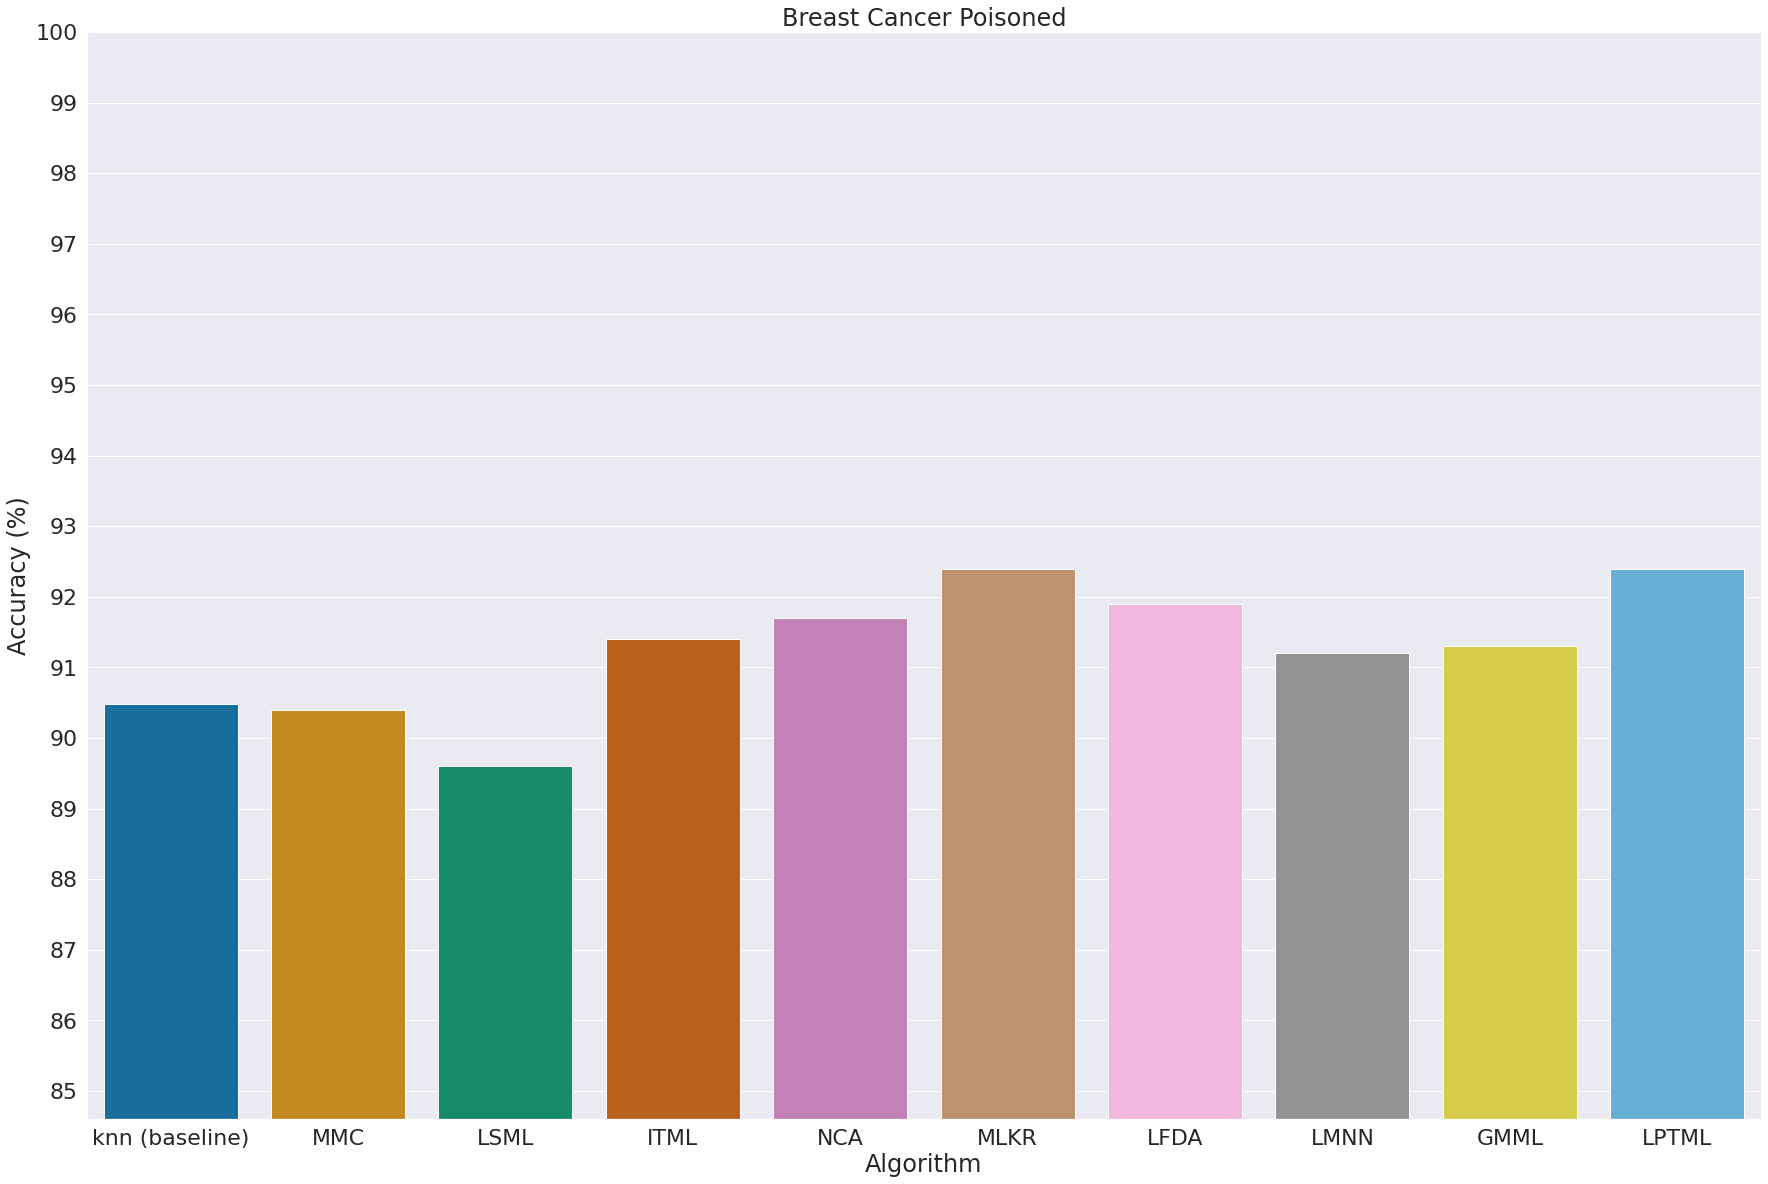

In [348]:
datasets = all_results_ml.dataset.unique()
for ds in datasets: 
    plot_and_save_ml(all_results_ml, ds)


In [222]:
results_ml[results_ml.algorithm == "knn"]

,dataset,algorithm,n_neighbors,accuracy(%),type,dimensions
36,synthetic,knn,5,60.000000,NaN,NaN
37,soybean_real,knn,5,80.459770,NaN,NaN
38,iris,knn,5,97.777778,NaN,NaN
39,wine,knn,5,66.666667,NaN,NaN
40,ionosphere,knn,5,79.245283,NaN,NaN
41,ionosphere_poisoned,knn,5,86.206897,NaN,NaN
42,wine_poisoned,knn,5,62.711864,NaN,NaN
43,iris_poisoned,knn,5,92.000000,NaN,NaN
44,breast_cancer_poisoned,knn,5,93.506494,NaN,NaN


In [297]:
results_metric_learning_lptml.algorithm.unique()

array(['MMC', 'LSML', 'ITML', 'NCA', 'MLKR', 'LFDA', 'LMNN', 'GMML',
       'LPTML'], dtype=object)

In [321]:
datasets

array(['Breast Cancer', 'Ionosphere', 'Ionosphere Poisoned', 'Iris',
       'Iris Poisoned', 'Soybean Real', 'Synthetic', 'Wine',
       'Wine Poisoned', 'Breast Cancer Poisoned'], dtype=object)